## How to Process Data:
Text Cleaning,
Tokenization,
Stopword,
Lemmatization

## How ML Models Work:
Introduction to Machine Learning
Text Representation,
Bag of Words,
TF-IDF,
Word Embeddings (Word2Vec)

## Word Embeddings (Word2Vec):
Word2Vec Basics,
Gensim Library for Word2Vec

In [12]:
pip install tensorflow-datasets

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/5.3 MB 1.7 MB/s eta 0:00:04
   - -------------------------------------- 0.1/5.3 MB 1.7 MB/s eta 0:00:04
   - -------------------------------------- 0.2/5.3 MB 1.5 MB/s eta 0:00:04
   -- ------------------------------------- 0.3/5.3 MB 1.7 MB/s eta 0:00:03
   --- ------------------------------------ 0.5/5.3 MB 2.1 MB/s eta 0:00:03
   --- ------------------------------------ 0.5/5.3 MB 1.9 MB/s eta 0:00:03
   ----- ---------------------------------- 0.7/5.3 MB 2.1 MB/s eta 0:00:03
   ----- ---------------------------------- 0.7/5.3 MB 2.0 MB/s eta 0:00:03
   ----- ---------------------------------- 0.8/5.3 MB 1.9 MB/s eta 0:00:03
   ------- -------------------------------- 0.9/5.3 MB 2.2 MB/s eta 0:00:03
   -------- ------------------------------- 1.1/5.3 MB 2.1 MB/s eta 0

In [21]:
import pandas as pd
import tensorflow_datasets as tfds

#load the IMDB Data
df,_ = tfds.load('YelpPolarityReviews',as_supervised=True,with_info=True)

#convert tensorflow dataset to the pandas DataFrame 
def datasets_to_Dataframe(dataset):
    data=[]
    for text,label in tfds.as_numpy(dataset):
        sentiment='positive' if label == 1 else 'negative'
        data.append((text.decode('utf-8'),sentiment))
    df=pd.DataFrame(data,columns=['Reviews','Sentiment'])
    return df 
#convert training and testing datasets to dataframe
df=datasets_to_Dataframe(df['train'])
    

In [23]:
df.head()

,Reviews,Sentiment
0,The Groovy P. and I ventured to his old stompi...,positive
1,Mediocre burgers - if you are in the area and ...,negative
2,Not at all impressed...our server was not very...,negative
3,I wish I would have read Megan P's review befo...,negative
4,A large selection of food from all over the wo...,positive


In [29]:
df.shape

(560000, 2)

In [33]:
df.dropna()

,Reviews,Sentiment
0,The Groovy P. and I ventured to his old stompi...,positive
1,Mediocre burgers - if you are in the area and ...,negative
2,Not at all impressed...our server was not very...,negative
3,I wish I would have read Megan P's review befo...,negative
4,A large selection of food from all over the wo...,positive
...,...,...
559995,Been coming to this location for over a month ...,positive
559996,This has been a great place to eat in Chandler...,negative
559997,"EXCELLENT SERVICE.. ASH, the owner, was except...",positive
559998,We came to this place for brunch a long time a...,positive


In [37]:
df.iloc[0]['Reviews']

"The Groovy P. and I ventured to his old stomping grounds for lunch today.  The '5 and Diner' on 16th St and Colter left me with little to ask for.  Before coming here I had a preconceived notion that 5 & Diners were dirty and nasty. Not the case at all.\\n\\nWe walk in and let the waitress know we want to sit outside (since it's so nice and they had misters).  We get two different servers bringing us stuff (talk about service) and I ask the one waitress for recommendations.  I didn't listen to her, of course, and ordered the Southwestern Burger w/ coleslaw and started with a nice stack of rings.\\n\\nThe Onion Rings were perfectly cooked.  They looked like they were prepackaged, but they were very crispy and I could actually bite through the onion without pulling the entire thing out (don't you hate that?!!!)\\n\\nThe Southwestern Burger was order Medium Rare and was cooked accordingly.  Soft, juicy, and pink with a nice crispy browned outer layer that can only be achieved on a well u

In [45]:
df.iloc[3]["Sentiment"]

'negative'

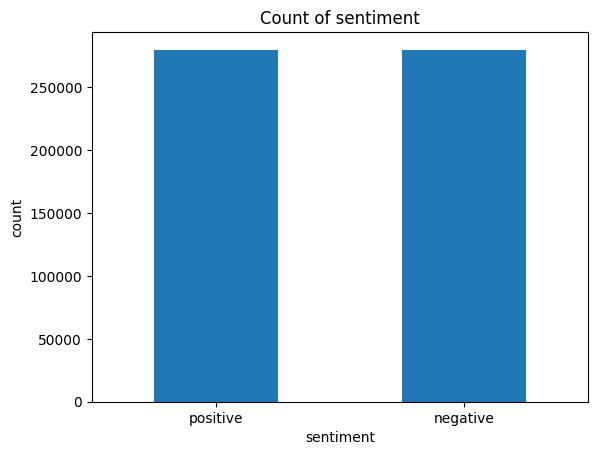

In [53]:
import matplotlib.pyplot as plt
sentiment_count=df['Sentiment'].value_counts()
plt.Figure(figsize=(8,5))
sentiment_count.plot(kind='bar')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.title('Count of sentiment')
plt.xticks(rotation=0)
plt.show()

In [57]:
pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/624.3 kB 495.5 kB/s eta 0:00:02
   ------- -------------------------------- 122.9/624.3 kB 1.0 MB/s eta 0:00:01
   ------------- -------------------------- 204.8/624.3 kB 1.1 MB/s eta 0:00:01
   --------------------- ------------------ 337.9/624.3 kB 1.6 MB/s eta 0:00:01
   -------------------------- ------------- 409.6/624.3 kB 1.6 MB/s eta 0:00:01
   ------------------------------------ --- 573.4/624.3 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.5 MB 3.5 MB/s eta 0:00:01
   ------ --------------------------------- 0.2/1.5 MB 2.4 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.5 MB 3.3 MB/s eta 0:00:01


In [63]:
# textblob contain two types 
#1)Polarity 2)Subjectivity
#polarity-[-1:1] -1--> Negitivity 1--> positivity
# Subjectivity
#Example Text 
from textblob import TextBlob
#try putting a text here as an example
text="the taste of food was good, but was cold and reached very late"

analysis = TextBlob(text)
sentiment_polarity = analysis.sentiment.polarity
print(sentiment_polarity)

-0.09666666666666668


In [73]:
# Import the TextBlob class from the textblob library

from textblob import TextBlob

# Limit the analysis to the first 200 reviews
num_reviews_to_analyze = 200

# Initialize variables for accuracy calculation
correct_predictions = 0

# Iterate through the first 100 reviews in the dataset
for index, row in df.head(num_reviews_to_analyze).iterrows():
    # Extract the review text from the 'review' column
    review_text = row['Reviews']

    # Create a TextBlob object for the current review
    analysis = TextBlob(review_text)

    # Calculate the sentiment polarity of the review
    # Textblob object can use function sentiment.polarity to give the object as in text's sentiment a score from -1(very negative) to +1(very positive) or 0 (neutral)

    sentiment_polarity = analysis.sentiment.polarity

    # Convert polarity to predicted sentiment label
    predicted_sentiment = 'positive' if sentiment_polarity > 0 else 'negative' if sentiment_polarity < 0 else 'neutral'

    # Compare with the true sentiment label
    true_sentiment = row['Sentiment']

    # Check if prediction is correct
    if predicted_sentiment == true_sentiment:
        correct_predictions += 1

    # Print the sentiment polarity and predicted sentiment of the review
    print(f"Review {index + 1}: Polarity={sentiment_polarity}, Predicted Sentiment={predicted_sentiment}, True Sentiment={true_sentiment}")



# Calculate accuracy
accuracy = correct_predictions / num_reviews_to_analyze
print(f"Accuracy: {accuracy * 100:.2f}%")


Review 1: Polarity=0.146062748015873, Predicted Sentiment=positive, True Sentiment=positive
Review 2: Polarity=0.06666666666666667, Predicted Sentiment=positive, True Sentiment=negative
Review 3: Polarity=0.20709290709290704, Predicted Sentiment=positive, True Sentiment=negative
Review 4: Polarity=0.1755982142857143, Predicted Sentiment=positive, True Sentiment=negative
Review 5: Polarity=0.5380952380952381, Predicted Sentiment=positive, True Sentiment=positive
Review 6: Polarity=0.23392857142857143, Predicted Sentiment=positive, True Sentiment=positive
Review 7: Polarity=0.4101190476190476, Predicted Sentiment=positive, True Sentiment=positive
Review 8: Polarity=0.3648148148148148, Predicted Sentiment=positive, True Sentiment=positive
Review 9: Polarity=0.38571428571428573, Predicted Sentiment=positive, True Sentiment=positive
Review 10: Polarity=0.14791666666666667, Predicted Sentiment=positive, True Sentiment=positive
Review 11: Polarity=-0.11306666666666665, Predicted Sentiment=neg

In [85]:
df=df.sample(n=30000,random_state=42)

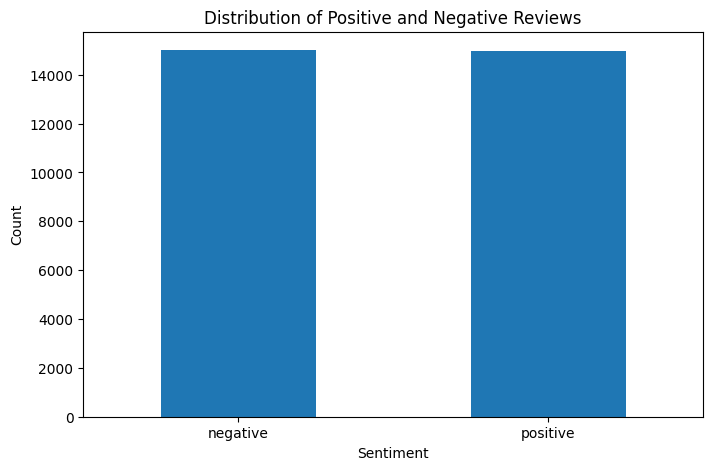

In [89]:
sentiment_counts = df['Sentiment'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar')
plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Text Cleaning

In [92]:
from bs4 import BeautifulSoup

text_with_html = '<p>This is an sample <b>Food</b> review </p>'

text_without_html=BeautifulSoup(text_with_html,"html.parser").get_text()

print("Text without HTML tags:", text_without_html)

Text without HTML tags: This is an sample Food review 


In [96]:
import re

# Remove HTML tags (if any)
df['Reviews']=df['Reviews'].apply(lambda x : BeautifulSoup(x,'html.parser').get_text())

# Convert to lowercase
df['Reviews']=df['Reviews'].apply(lambda x :x.lower())

df['Reviews']=df['Reviews'].apply(lambda x : re.sub(r'[^a-zA-Z0-9\s]', '', x))

df.head()

                                  

,Reviews,Sentiment
34566,i went in having loved what the past restauran...,negative
223092,i like paradise bakery in general they serve ...,negative
110270,this is my goto spot for wine and spiritsnni p...,positive
365013,i have stayed with this family of resorts twic...,negative
311625,easily one of the best brunches i have ever ha...,positive


## Tokenization:

In [102]:
#Example 
import nltk
nltk.download('punkt_tab')
# Import the word_tokenize function from the nltk.tokenize module
from nltk.tokenize import word_tokenize

# Sample text
sample_text = "This is random text."

# Tokenize the text using word_tokenize
tokens = word_tokenize(sample_text)

# Print the list of tokens
print(tokens)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dilee\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


['This', 'is', 'random', 'text', '.']


In [106]:
df['Reviews']=df['Reviews'].apply(lambda x : word_tokenize(x))

In [108]:
df

,Reviews,Sentiment
34566,"[i, went, in, having, loved, what, the, past, ...",negative
223092,"[i, like, paradise, bakery, in, general, they,...",negative
110270,"[this, is, my, goto, spot, for, wine, and, spi...",positive
365013,"[i, have, stayed, with, this, family, of, reso...",negative
311625,"[easily, one, of, the, best, brunches, i, have...",positive
...,...,...
430722,"[i, have, become, a, big, fan, of, blow, dry, ...",negative
555323,"[my, very, sweet, fiancu00e9, likes, to, surpr...",positive
514423,"[whatever, it, was, i, have, found, it, at, ar...",positive
402635,"[this, place, is, always, a, hit, i, love, the...",positive


# Stopword Removal:
 Stopwords are common words that do not carry significant meaning and are often removed to focus on the more meaningful words.

In [113]:
from nltk.corpus import stopwords
nltk.download('stopwords')
# Remove stopwords - I, is, am, are, the, an
stop_words=set(stopwords.words('english'))
df['Reviews']=df['Reviews'].apply(lambda x:[word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dilee\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [115]:
df.head()

,Reviews,Sentiment
34566,"[went, loved, past, restaurant, nni, craving, ...",negative
223092,"[like, paradise, bakery, general, serve, great...",negative
110270,"[goto, spot, wine, spiritsnni, priced, lees, n...",positive
365013,"[stayed, family, resorts, twice, orlando, twic...",negative
311625,"[easily, one, best, brunches, ever, long, stor...",positive


 ## Lemmatization:
Lemmatization reduces words to their base or root form to unify words with similar meanings.

In [123]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer=WordNetLemmatizer()
sentence="The quick brown foxes are jumping over the lazy dogs."

tokens=word_tokenize(sentence)

lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

print("Original Tokens:", tokens)
print("Lemmatized Tokens:", lemmatized_tokens)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dilee\AppData\Roaming\nltk_data...


Original Tokens: ['The', 'quick', 'brown', 'foxes', 'are', 'jumping', 'over', 'the', 'lazy', 'dogs', '.']
Lemmatized Tokens: ['The', 'quick', 'brown', 'fox', 'are', 'jumping', 'over', 'the', 'lazy', 'dog', '.']


In [127]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df['Reviews'] = df['Reviews'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Convert list of tokens back to strings
df['Reviews'] = df['Reviews'].apply(lambda x: ' '.join(x))

df.head()

,Reviews,Sentiment
34566,went loved past restaurant nni craving hot sou...,negative
223092,like paradise bakery general serve great sandw...,negative
110270,goto spot wine spiritsnni priced lee nearby ha...,positive
365013,stayed family resort twice orlando twice westo...,negative
311625,easily one best brunch ever long story short g...,positive


 ## Introduction to Machine Learning:

Bag of Words (BoW):

In [136]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
count_vectorizer = CountVectorizer()

# Fit and transform the text data to obtain the count vectors
count_vectors = count_vectorizer.fit_transform(df["Reviews"])

# Convert the count vectors to an array
count_vectors_array = count_vectors.toarray()

# Display the count vectors
print("Count Vectors:")
print(count_vectors_array)

Count Vectors:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [140]:
df["Reviews"].iloc[3]

'stayed family resort twice orlando twice weston virginia property always top notch till grandview others said mirror lamp room ha broke many piece glued back toghther ordered walker room arrival month advance called two day ariving day arrival told set arrived 2 30 front desk said stair security deliver right away 900 called front desk still arrived come find wasnt even property yet sign front everywhere telling park 15 minute check would great check process took 15 minute doesnt sign control long claim handicap friendly resort 3 handicap spot per 500 room building activity daily three thing day trio grocery shop pool picture crap lesson day day day kid adult activity would expect first rate time share'

In [142]:
print(count_vectors[3])

  (0, 57056)	1
  (0, 8284)	1
  (0, 60337)	1
  (0, 17647)	1
  (0, 68382)	2
  (0, 75628)	1
  (0, 34537)	1
  (0, 5282)	1
  (0, 45312)	1
  (0, 20961)	6
  (0, 80147)	1
  (0, 74553)	1
  (0, 709)	2
  (0, 27385)	1
  (0, 75349)	1
  (0, 28699)	1
  (0, 66240)	2
  (0, 82433)	2
  (0, 57329)	1
  (0, 87036)	1
  (0, 85238)	1
  (0, 63309)	2
  (0, 81088)	1
  (0, 54709)	1
  (0, 80135)	1
  :	:
  (0, 23854)	1
  (0, 18617)	1
  (0, 16676)	1
  (0, 35799)	2
  (0, 31733)	1
  (0, 59651)	1
  (0, 2298)	1
  (0, 12995)	1
  (0, 3843)	2
  (0, 20676)	1
  (0, 79878)	1
  (0, 79503)	1
  (0, 81916)	1
  (0, 34859)	1
  (0, 71506)	1
  (0, 61683)	1
  (0, 60317)	1
  (0, 19562)	1
  (0, 44278)	1
  (0, 42661)	1
  (0, 4061)	1
  (0, 27939)	1
  (0, 29804)	1
  (0, 64552)	1
  (0, 71148)	1


In [149]:
X=count_vectors_array
# Create a mapping dictionary
label_mapping = {"positive": 1, "negative": 0}

# Convert string labels to numerical labels
y = [label_mapping[label] for label in df["Sentiment"]]
print(y)

[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 

In [165]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

X=X[:200]
y=y[:200]

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

nb_model = MultinomialNB()

nb_model.fit(x_train,y_train)

y_pred=nb_model.predict(x_test)

print(f'Accuracy Score {accuracy_score(y_test,y_pred)}')
print(f'Classification Repory {classification_report(y_test,y_pred)}')

Accuracy Score 0.84
Classification Repory               precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.77      0.91      0.83        22

    accuracy                           0.84        50
   macro avg       0.84      0.85      0.84        50
weighted avg       0.85      0.84      0.84        50



In [171]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear', random_state=42)

# Train the model
svc_model.fit(x_train, y_train)

# Predict the labels for the test set
y_pred = svc_model.predict(x_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.67      0.91      0.77        22

    accuracy                           0.76        50
   macro avg       0.78      0.78      0.76        50
weighted avg       0.80      0.76      0.76        50



In [175]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(random_state=42)

# Train the model
rfc_model.fit(x_train, y_train)

# Predict the labels for the test set
y_pred = rfc_model.predict(x_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.56      1.00      0.72        22

    accuracy                           0.66        50
   macro avg       0.78      0.70      0.64        50
weighted avg       0.81      0.66      0.63        50

